# Predicting Home Prices in Bangalore

This notebook focuses on predicting home prices in Bangalore using machine learning techniques. We'll perform data cleaning, feature engineering, and model training to achieve this goal.

## Introduction

In this project, we aim to predict home prices in Bangalore using a dataset containing various features such as location, size, total square feet area, number of bathrooms, etc.

## Dataset Description

The dataset contains information about homes in Bangalore, including their location, size, total square feet area, number of bathrooms, and price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

We'll begin by loading the dataset and exploring its structure and content.

In [2]:
data = pd.read_csv('/content/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## General data analysis

In [3]:
data.shape

(13320, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data.drop(['area_type','society','balcony', 'availability'],axis=1,inplace=True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

In [9]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(13246, 5)

## Feature Engineering

In [12]:
data['count_of_rooms'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,location,size,total_sqft,bath,price,count_of_rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
data.total_sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
data[~data['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,count_of_rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqft)
data.total_sqft.isna().sum()

46

In [18]:
data.dropna(inplace=True)
data.shape

(13200, 6)

In [19]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,count_of_rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
data.location = data.location.apply(lambda x: x.strip())
data.location.value_counts()

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

## Dimensionality Reduction

In [23]:
top_locations = data.location.value_counts().sort_values(ascending=False).head(50)
top_locations

location
Whitefield                  533
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              264
Thanisandra                 235
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           151
Hennur Road                 150
7th Phase JP Nagar          148
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     80
Kasavanhalli                 79
Harlur                       79
Banashankari                 74
Hormavu                      74
Kengeri                      72
Ramamurthy Nagar             72
Koramangala                  72

In [24]:
data.location = data.location.apply(lambda x: 'other' if x not in top_locations else x)
data.location.unique()

array(['Electronic City Phase II', 'other', 'Uttarahalli', 'Kothanur',
       'Whitefield', 'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar',
       'Sarjapur', 'Raja Rajeshwari Nagar', 'Kengeri', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Yelahanka', 'Hebbal',
       'Kanakpura Road', 'Electronics City Phase 1', 'Sarjapur  Road',
       'HSR Layout', 'KR Puram', 'Begur Road', 'Varthur', 'Haralur Road',
       'Hennur Road', 'Kasavanhalli', 'Yeshwanthpur', 'Chandapura',
       'Nagarbhavi', 'Ramamurthy Nagar', 'Malleshwaram', 'Akshaya Nagar',
       'Hormavu', '8th Phase JP Nagar', 'Hosa Road', 'Panathur',
       'Koramangala', 'Budigere', 'Old Madras Road', 'Kaggadasapura',
       'Jakkur', 'TC Palaya', 'JP Nagar', 'Thigalarapalya', 'Harlur',
       'Bannerghatta Road', 'Hennur', 'Jalahalli', 'Hoodi',
       'Banashankari', 'Rachenahalli'], dtype=object)

In [25]:
price_by_location = data.groupby('location')['price_per_sqft'].mean()
price_by_location

location
7th Phase JP Nagar           6608.894451
8th Phase JP Nagar           6385.019507
Akshaya Nagar                5612.995244
Banashankari                 6985.250792
Bannerghatta Road            5917.362058
Begur Road                   4280.095637
Bellandur                    5914.200064
Budigere                     5155.500353
Chandapura                   3117.667609
Electronic City              4619.216887
Electronic City Phase II     3882.655658
Electronics City Phase 1     4735.578566
HSR Layout                   6993.510960
Haralur Road                 5463.704057
Harlur                       6780.277398
Hebbal                       7449.043325
Hennur                       4928.991274
Hennur Road                  6143.992436
Hoodi                        6276.553344
Hormavu                      5027.606974
Hosa Road                    5466.848518
JP Nagar                     6112.523515
Jakkur                       6545.485034
Jalahalli                    6639.358467
KR Pura

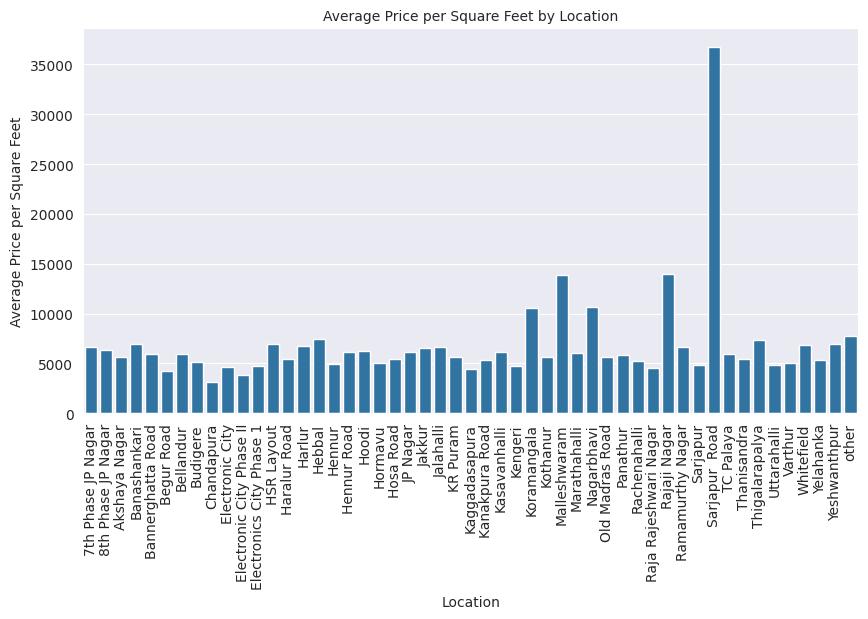

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x=price_by_location.index, y=price_by_location.values)
plt.xticks(rotation=90)
plt.title('Average Price per Square Feet by Location', fontsize=10)
plt.xlabel('Location')
plt.ylabel('Average Price per Square Feet')
plt.show()

## Outlier Removal Using Business Logic

In real estate logic, there's usually about 300 square feet per bedroom. For example, a 2-bedroom apartment should ideally be at least 600 square feet. Any apartment with, say, 400 square feet for 2 bedrooms raises suspicion and could be considered an outlier. Therefore, we'll establish a minimum threshold of 300 square feet per bedroom to address such cases.








In [27]:
data = data[~(data.total_sqft/data.count_of_rooms<300)]
data.shape

(12456, 7)

## Outlier Removal Using 1.5 IQR rule

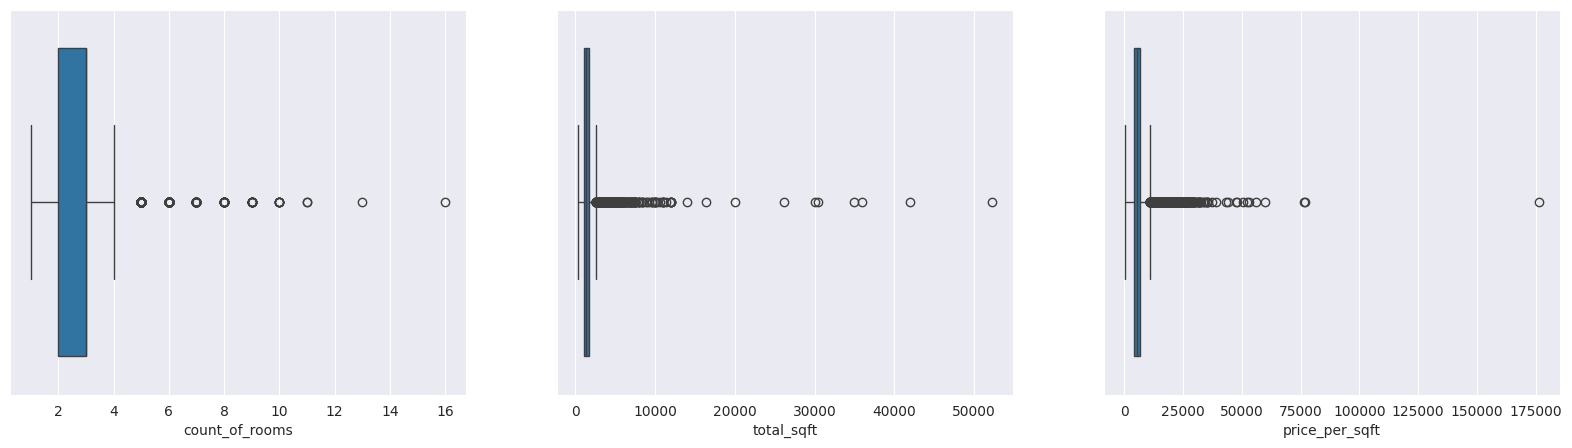

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=data, x='count_of_rooms', ax=ax[0])
sns.boxplot(data=data, x='total_sqft', ax=ax[1])
sns.boxplot(data=data, x='price_per_sqft', ax=ax[2]);

In [29]:
def remove_outliers(data, column):
  quantile25, quantile75 = np.percentile(data[column], [25, 75])
  IQR = quantile75 - quantile25
  lower_bound = quantile25 - 1.5 * IQR
  upper_bound = quantile75 + 1.5 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

In [30]:
for column in ['count_of_rooms', 'total_sqft', 'price_per_sqft']:
  data = remove_outliers(data, column)
data.shape

(10335, 7)

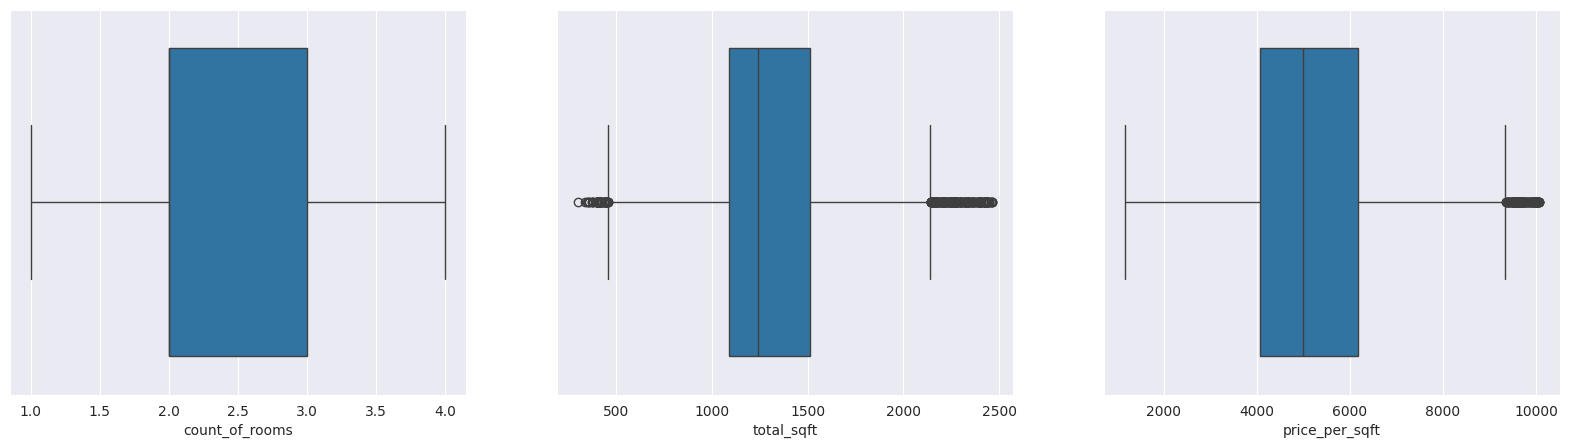

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=data, x='count_of_rooms', ax=ax[0])
sns.boxplot(data=data, x='total_sqft', ax=ax[1])
sns.boxplot(data=data, x='price_per_sqft', ax=ax[2]);

## Removing data in which the price increases as the number of rooms decreases

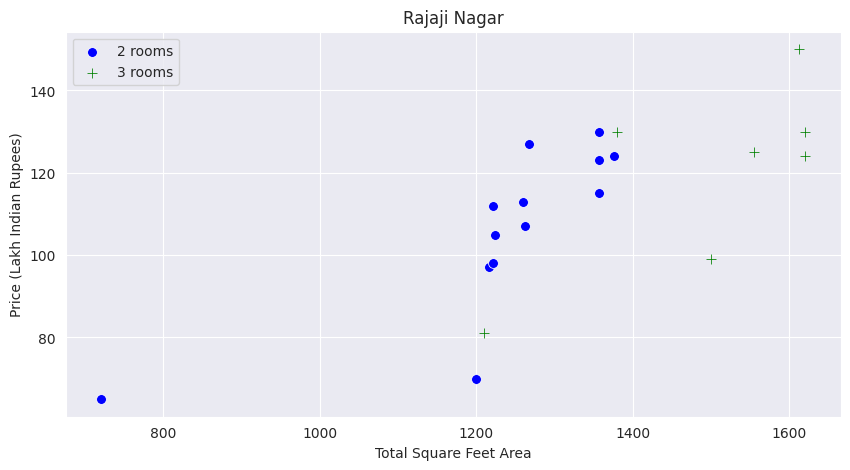

In [32]:
def plot_scatter_chart(data, location):
    rooms_2 = data[(data.location==location) & (data.count_of_rooms==2)]
    rooms_3 = data[(data.location==location) & (data.count_of_rooms==3)]
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=rooms_2.total_sqft, y=rooms_2.price, data=data, color='blue', label='2 rooms', s=50)
    sns.scatterplot(x=rooms_3.total_sqft, y=rooms_3.price, data=data, marker='+', color='green', label='3 rooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(data, "Rajaji Nagar")

In [33]:
def remove_count_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        rooms_stats = {}
        for rooms, rooms_df in location_df.groupby('count_of_rooms'):
            rooms_stats[rooms] = {
                'mean': np.mean(rooms_df.price_per_sqft),
                'std': np.std(rooms_df.price_per_sqft),
                'count': rooms_df.shape[0]
            }
        for rooms, rooms_df in location_df.groupby('count_of_rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

data = remove_count_outliers(data)
data.shape

(6337, 7)

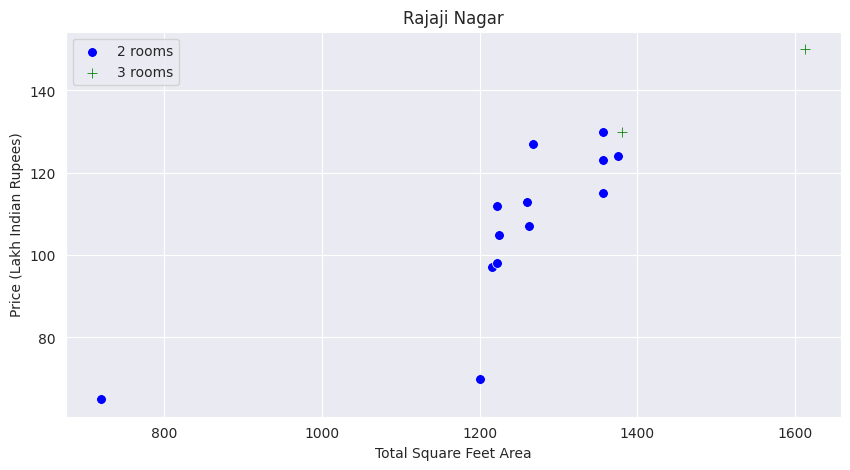

In [34]:
plot_scatter_chart(data, "Rajaji Nagar")

## Outlier Removal Using Bathrooms Feature

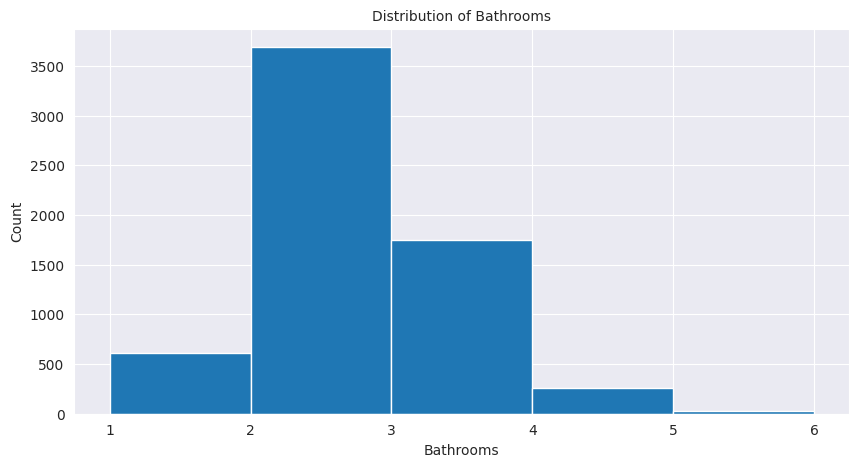

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(data.bath, bins=5)
plt.title('Distribution of Bathrooms', fontsize=10)
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [36]:
data.bath.unique()

array([2., 3., 1., 5., 4., 6.])

Having 2 more bathrooms than the number of bedrooms in a home is an uncommon scenario.

In [37]:
data[data.bath > data.count_of_rooms + 2]

,location,size,total_sqft,bath,price,count_of_rooms,price_per_sqft
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03433


In [38]:
data = data[data.bath < data.count_of_rooms + 2]

In [39]:
data.shape

(6329, 7)

## Preparing data for training

In [40]:
data = data.drop(['price_per_sqft', 'size'], axis=1)
data.head()

,location,total_sqft,bath,price,count_of_rooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,other,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
12,7th Phase JP Nagar,1000.0,2.0,38.00,2


In [41]:
dummies = pd.get_dummies(data.location)
dummies.head()

,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,Begur Road,Bellandur,Budigere,Chandapura,Electronic City,...,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
data = pd.concat([data, dummies.drop('other', axis=1)], axis=1)
data.head()

,location,total_sqft,bath,price,count_of_rooms,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,other,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
data = data.drop('location', axis=1)
data.head()

,total_sqft,bath,price,count_of_rooms,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,Begur Road,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,1000.0,2.0,38.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X = data.drop('price', axis=1)
y = data.price

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5063, 53), (1266, 53), (5063,), (1266,))

## Model defining and training

Now, we'll define machine learning models, train them, and evaluate their performance.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error


models_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
            'splitter': ['best', 'random']
        }
    }
}

In [48]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, model_params in models_params.items():
  gs = GridSearchCV(model_params['model'], model_params['params'], cv=cv, return_train_score=False)
  gs.fit(X_train, y_train)
  scores.append({
      'model_name': model_name,
      'model': gs.best_estimator_,
      'best_score': gs.best_score_,
      'best_params': gs.best_params_,
      'mse': mean_absolute_error(y_test, gs.predict(X_test)),
      'r2_score': r2_score(y_test, gs.predict(X_test))
  })

data_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'mse', 'r2_score'])
data_scores

,model,best_score,best_params,mse,r2_score
0,LinearRegression(),0.796227,{'fit_intercept': True},12.512085,0.811496
1,"Lasso(alpha=1, selection='random')",0.741066,"{'alpha': 1, 'selection': 'random'}",14.596288,0.753969
2,DecisionTreeRegressor(criterion='poisson'),0.721941,"{'criterion': 'poisson', 'splitter': 'best'}",13.019906,0.756801


In [49]:
best_model = data_scores.loc[data_scores.r2_score.idxmax(), 'model']
best_model

LinearRegression()

## Model testing

We'll test the best performing model with sample data to predict home prices.

In [50]:
def predict_price(location, sqft, bath, count_of_rooms):
  loc_index = np.where(X.columns == location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = count_of_rooms
  if loc_index >= 0:
    x[loc_index] = 1
  return best_model.predict([x])[0]

In [51]:
predict_price('7th Phase JP Nagar', 1000, 2, 2)

61.02537919544146

In [52]:
predict_price('7th Phase JP Nagar', 1000, 2, 3)

63.443196393499164

## Exporting the files

Finally, we'll export the trained model and the column information for future use.

In [53]:
import pickle

with open(f'banglore_home_prices_model.pickle', 'wb') as f:
  pickle.dump(best_model, f)

In [54]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))